#21BIO201: Lab Assignment 5
<pre>
Name: Abhinav Pandey
Rollno: AM.EN.U4AIE21088




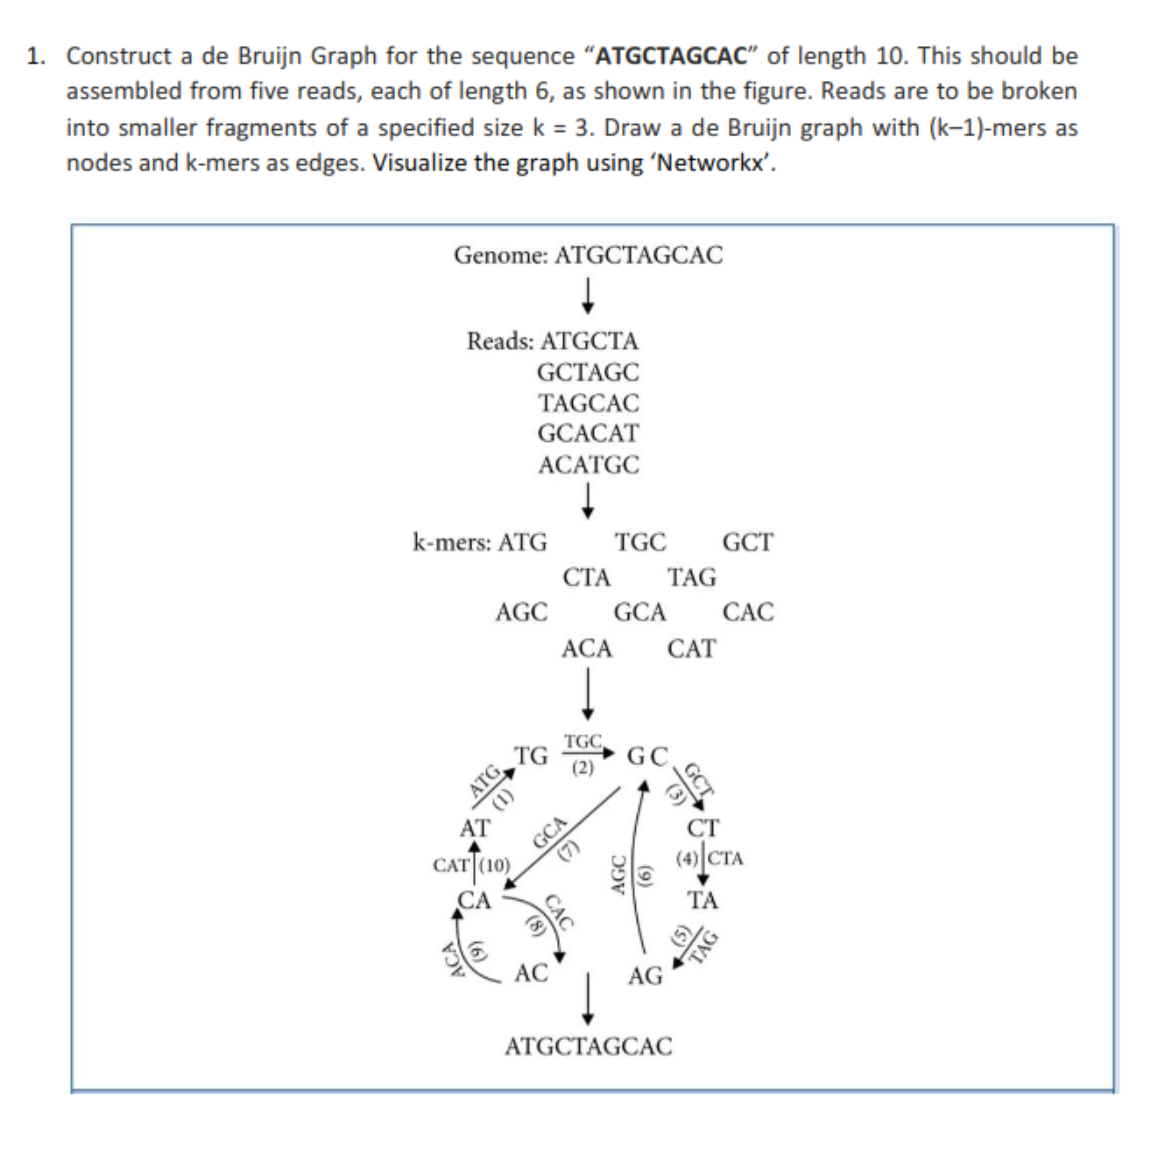

In [3]:
#generate reads
def reads_generate(seq, length):
    reads = []
    for i in range(0, len(seq)-length+1):
        reads.append(seq[i:i+length])
    return reads


reads = reads_generate("ATGCTAGCAC", 6)
reads

['ATGCTA', 'TGCTAG', 'GCTAGC', 'CTAGCA', 'TAGCAC']

In [4]:
#generate k-1 mers
def kmersminus1_generate(reads, k):
    graph = []
    for read in reads:
        kmer1 = read[0:k]
        kmer2 = read[k: len(read)]
        if not kmer1 in graph:
            graph.append(kmer1)
        if not kmer2 in graph:
            graph.append(kmer2)
    return graph

kmers = kmersminus1_generate(reads, 3)
kmers

['ATG', 'CTA', 'TGC', 'TAG', 'GCT', 'AGC', 'GCA', 'CAC']

In [7]:
#generate debruijin graph

def debrujin_graph(kmers):
    graph = {}
    length = 1
    for kmer in kmers:
        kmer1 = kmer[0:length+1]
        kmer2 = kmer[length: len(kmer)]
        if not kmer1 in graph:
            graph[kmer1] = []
            graph[kmer1].append([kmer2, kmer])
        else:
            graph[kmer1].append([kmer2, kmer])
    return graph

graph = debrujin_graph(kmers)
graph

{'AT': [['TG', 'ATG']],
 'CT': [['TA', 'CTA']],
 'TG': [['GC', 'TGC']],
 'TA': [['AG', 'TAG']],
 'GC': [['CT', 'GCT'], ['CA', 'GCA']],
 'AG': [['GC', 'AGC']],
 'CA': [['AC', 'CAC']]}

In [8]:
#visualise the graph using networkx
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
for key in graph:
    for value in graph[key]:
        G.add_edge(key, value[0], label=value[1])
nx.draw_networkx(G, with_labels=True)
nx.draw_networkx_edge_labels(G)

plt.figure(figsize=(40,10))
plt.show()
